In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
yellow_cab23 = pd.read_parquet('data/yellow_tripdata_2023-01.parquet', engine='fastparquet')

In [4]:
print(yellow_cab23.shape)
yellow_cab23.head()

(3066766, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [5]:
zones = pd.read_csv('data/taxi+_zone_lookup.csv')
zones.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [6]:
zones_manh = zones[zones.Borough=='Manhattan']
PUzones_manh = zones_manh.copy()
DOzones_manh = zones_manh.copy()
PUnames = {'LocationID':'PULocationID', 'Borough':'PUBorough', 'Zone':'PUZone', 'service_zone':'PUservice_zone'}
DOnames = {'LocationID':'DOLocationID', 'Borough':'DOBorough', 'Zone':'DOZone', 'service_zone':'DOservice_zone'}
PUzones_manh.rename(columns=PUnames,inplace=True)
DOzones_manh.rename(columns=DOnames,inplace=True)

In [7]:
yellow_cab23_joined = yellow_cab23.merge(PUzones_manh, on = 'PULocationID', how = 'left')
yellow_cab23_joined.head()
# zones.Borough.unique()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PUBorough,PUZone,PUservice_zone
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,0.5,0.00,0.0,1.0,14.30,2.5,0.00,Manhattan,Midtown Center,Yellow Zone
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,0.5,4.00,0.0,1.0,16.90,2.5,0.00,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,0.5,15.00,0.0,1.0,34.90,2.5,0.00,Manhattan,Clinton East,Yellow Zone
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,0.5,0.00,0.0,1.0,20.85,0.0,1.25,NaN,NaN,NaN
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,0.5,3.28,0.0,1.0,19.68,2.5,0.00,Manhattan,Gramercy,Yellow Zone


In [8]:
yellow_cab23_joined = yellow_cab23_joined.merge(DOzones_manh, on = 'DOLocationID', how = 'left')
yellow_cab23_joined.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.0,14.30,2.5,0.00,Manhattan,Midtown Center,Yellow Zone,Manhattan,Lenox Hill West,Yellow Zone
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.0,16.90,2.5,0.00,Manhattan,Central Park,Yellow Zone,Manhattan,Upper East Side South,Yellow Zone
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.0,34.90,2.5,0.00,Manhattan,Clinton East,Yellow Zone,Manhattan,Upper West Side North,Yellow Zone
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,1.0,20.85,0.0,1.25,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.0,19.68,2.5,0.00,Manhattan,Gramercy,Yellow Zone,Manhattan,East Village,Yellow Zone


In [9]:
yellow_cab23_joined.dropna(subset = ['PUBorough'], inplace = True)
print(yellow_cab23_joined.shape)
yellow_cab23_joined.head()

(2715369, 25)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.0,14.30,2.5,0.0,Manhattan,Midtown Center,Yellow Zone,Manhattan,Lenox Hill West,Yellow Zone
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.0,16.90,2.5,0.0,Manhattan,Central Park,Yellow Zone,Manhattan,Upper East Side South,Yellow Zone
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.0,34.90,2.5,0.0,Manhattan,Clinton East,Yellow Zone,Manhattan,Upper West Side North,Yellow Zone
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.0,19.68,2.5,0.0,Manhattan,Gramercy,Yellow Zone,Manhattan,East Village,Yellow Zone
5,2,2023-01-01 00:50:34,2023-01-01 01:02:52,1.0,1.84,1.0,N,161,137,1,...,1.0,27.80,2.5,0.0,Manhattan,Midtown Center,Yellow Zone,Manhattan,Kips Bay,Yellow Zone


In [10]:
yellow_cab23_joined.drop(['PUBorough', 'DOBorough', 'PUservice_zone', 'DOservice_zone'], axis = 1, inplace = True)
yellow_cab23_joined.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PUZone,DOZone
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.0,0.5,0.00,0.0,1.0,14.30,2.5,0.0,Midtown Center,Lenox Hill West
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.0,0.5,4.00,0.0,1.0,16.90,2.5,0.0,Central Park,Upper East Side South
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.0,0.5,15.00,0.0,1.0,34.90,2.5,0.0,Clinton East,Upper West Side North
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.0,0.5,3.28,0.0,1.0,19.68,2.5,0.0,Gramercy,East Village
5,2,2023-01-01 00:50:34,2023-01-01 01:02:52,1.0,1.84,1.0,N,161,137,1,...,1.0,0.5,10.00,0.0,1.0,27.80,2.5,0.0,Midtown Center,Kips Bay


### Zone Mapping:

In [11]:
zone_names = set(list(yellow_cab23_joined.DOZone.unique())+ list(yellow_cab23_joined.PUZone.unique()))

In [12]:
mapping ={
    1 : ['Morningside Heights', 'Manhattanville', 'Central Harlem', 'Central Harlem North','Bloomingdale', 'Lincoln Square East','Lincoln Square West', 'Manhattan Valley', 'Upper West Side North','Upper West Side South','Central Park'],
    2 : [ 'East Harlem North', 'East Harlem South', 'Lenox Hill East', 'Lenox Hill West', 'Upper East Side North','Upper East Side South', 'Yorkville East','Yorkville West'],
    3 : ['Meatpacking/West Village West', 'West Village', 'Clinton East', 'Clinton West', 'Penn Station/Madison Sq West', 'Midtown Center', 'Midtown East', 'Midtown North', 'Times Sq/Theatre District', 'Flatiron','Midtown South', 'Union Sq'],
    4 : [ 'Murray Hill',  'Sutton Place/Turtle Bay North', 'UN/Turtle Bay South', 'East Chelsea', 'Garment District',  'West Chelsea/Hudson Yards', 'Gramercy', 'Kips Bay','Stuy Town/Peter Cooper Village'],
    5 : ['Alphabet City','East Village', 'Lower East Side', 'Financial District North', 'Financial District South'],
    6 : ['Hudson Sq', 'SoHo', 'Little Italy/NoLiTa', 'TriBeCa/Civic Center', 'Chinatown', 'World Trade Center', 'Battery Park', 'Battery Park City'],
}

In [13]:
mappings_rev={}
for k in mapping.keys():
    mappings_rev[tuple(mapping[k])]=k

In [14]:
def zone_map(locality):
    for i in mappings_rev.keys():
        if locality in i:
            return int(mappings_rev[i])
    return -1

In [15]:
yellow_cab23_joined['PU_CustomZoneID']=yellow_cab23_joined['PUZone'].map(zone_map)
yellow_cab23_joined['DO_CustomZoneID']=yellow_cab23_joined['DOZone'].map(zone_map)

In [16]:
yellow_cab23_joined.shape

(2715369, 23)

In [17]:
#Removing Rows with Missing Custom Zones
yellow_cab23_joined=yellow_cab23_joined[(yellow_cab23_joined.PU_CustomZoneID!=-1)| (yellow_cab23_joined.DO_CustomZoneID==-1)]

In [18]:
yellow_cab23_joined.shape

(2637845, 23)

In [19]:
yellow_cab23_joined.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PUZone,DOZone,PU_CustomZoneID,DO_CustomZoneID
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,0.00,0.0,1.0,14.30,2.5,0.0,Midtown Center,Lenox Hill West,3,2
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,4.00,0.0,1.0,16.90,2.5,0.0,Central Park,Upper East Side South,1,2
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,15.00,0.0,1.0,34.90,2.5,0.0,Clinton East,Upper West Side North,3,1
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,3.28,0.0,1.0,19.68,2.5,0.0,Gramercy,East Village,4,5
5,2,2023-01-01 00:50:34,2023-01-01 01:02:52,1.0,1.84,1.0,N,161,137,1,...,10.00,0.0,1.0,27.80,2.5,0.0,Midtown Center,Kips Bay,3,4


### Compute Demand Matrix Pt

In [20]:
# Restricting data to month of January
yellow_cab23_jan23 = yellow_cab23_joined[(yellow_cab23_joined.tpep_pickup_datetime>'2023-01-01 00:00:00') & (yellow_cab23_joined.tpep_pickup_datetime<'2023-02-01 00:00:00')].sort_values(by='tpep_pickup_datetime')

In [21]:
def compute_pt(data_subset):
    pt = np.zeros((6,6))
    for i in range(data_subset.shape[0]):
        x = data_subset.iloc[i,:]
        pt[x[-2]-1,x[-1]-1]+=1
    return pt 

In [22]:
def master_compute_pt(data):
    start = pd.to_datetime('2023-01-01 00:00:00')
    end= start+pd.Timedelta(minutes=30)
    master_pt= compute_pt(data[(data.tpep_pickup_datetime>start) & (data.tpep_pickup_datetime<end)].sort_values(by='tpep_pickup_datetime'))
    start=end
    
    while start < pd.to_datetime('2023-02-01 00:00:00'):
        #print(start)
        end= start+pd.Timedelta(minutes=30)    
        data_subset = data[(data.tpep_pickup_datetime>start) & (data.tpep_pickup_datetime<end)].sort_values(by='tpep_pickup_datetime')
        pt = compute_pt(data_subset)
        master_pt = np.dstack((master_pt,pt))
        start = end
    return master_pt


In [ ]:
master_pt = master_compute_pt(yellow_cab23_jan23)

In [21]:
master_pt.shape

(6, 6, 1488)

In [22]:
np.save('data/master_pt_small',master_pt)

## Frequency distribution of maximum demand in a time unit

(array([310., 129., 106., 127., 253., 321., 181.,  49.,  11.,   1.]),
 array([  60. ,  518.7,  977.4, 1436.1, 1894.8, 2353.5, 2812.2, 3270.9,
        3729.6, 4188.3, 4647. ]),
 <BarContainer object of 10 artists>)

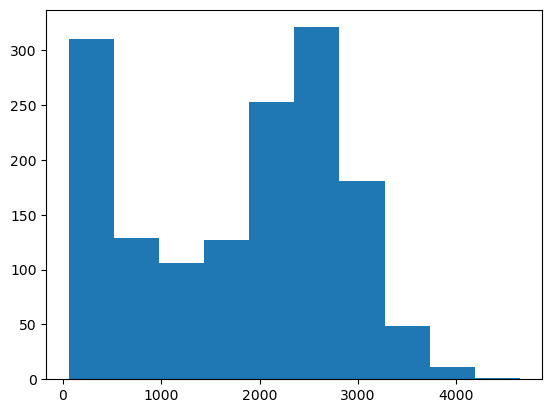

In [23]:
a=[]
for i in range(master_pt.shape[2]):
    a.append(np.sum(master_pt[:,:,i]))
    

plt.hist(a)

### Compute Cost Weight Matrices

In [24]:
wait_costs = np.zeros((6,6))
move_costs = np.zeros((6,6))

In [25]:
for i in range(6):
    for j in range(6):
        temp = yellow_cab23_jan23[(yellow_cab23_jan23.PU_CustomZoneID==i+1) & (yellow_cab23_jan23.DO_CustomZoneID==j+1)]
        avg_trip_dist = temp.trip_distance.sum()/temp.shape[0]
        avg_trip_cost = temp.total_amount.sum()/temp.shape[0]
        move_costs[i,j]=round(avg_trip_dist,2)
        wait_costs[i,j]=round(avg_trip_cost, 2)

In [26]:
wait_costs = (wait_costs-np.min(wait_costs))/(np.max(wait_costs)-np.min(wait_costs))
move_costs = (move_costs-np.min(move_costs))/(np.max(move_costs)-np.min(move_costs))

In [29]:
np.save('data/move_costs_small', move_costs)
np.save('data/wait_costs_small', wait_costs)

## Visualizing Demand for the 6 Boroughs

In [26]:
master_pt_small = np.load('data/master_pt_small.npy')

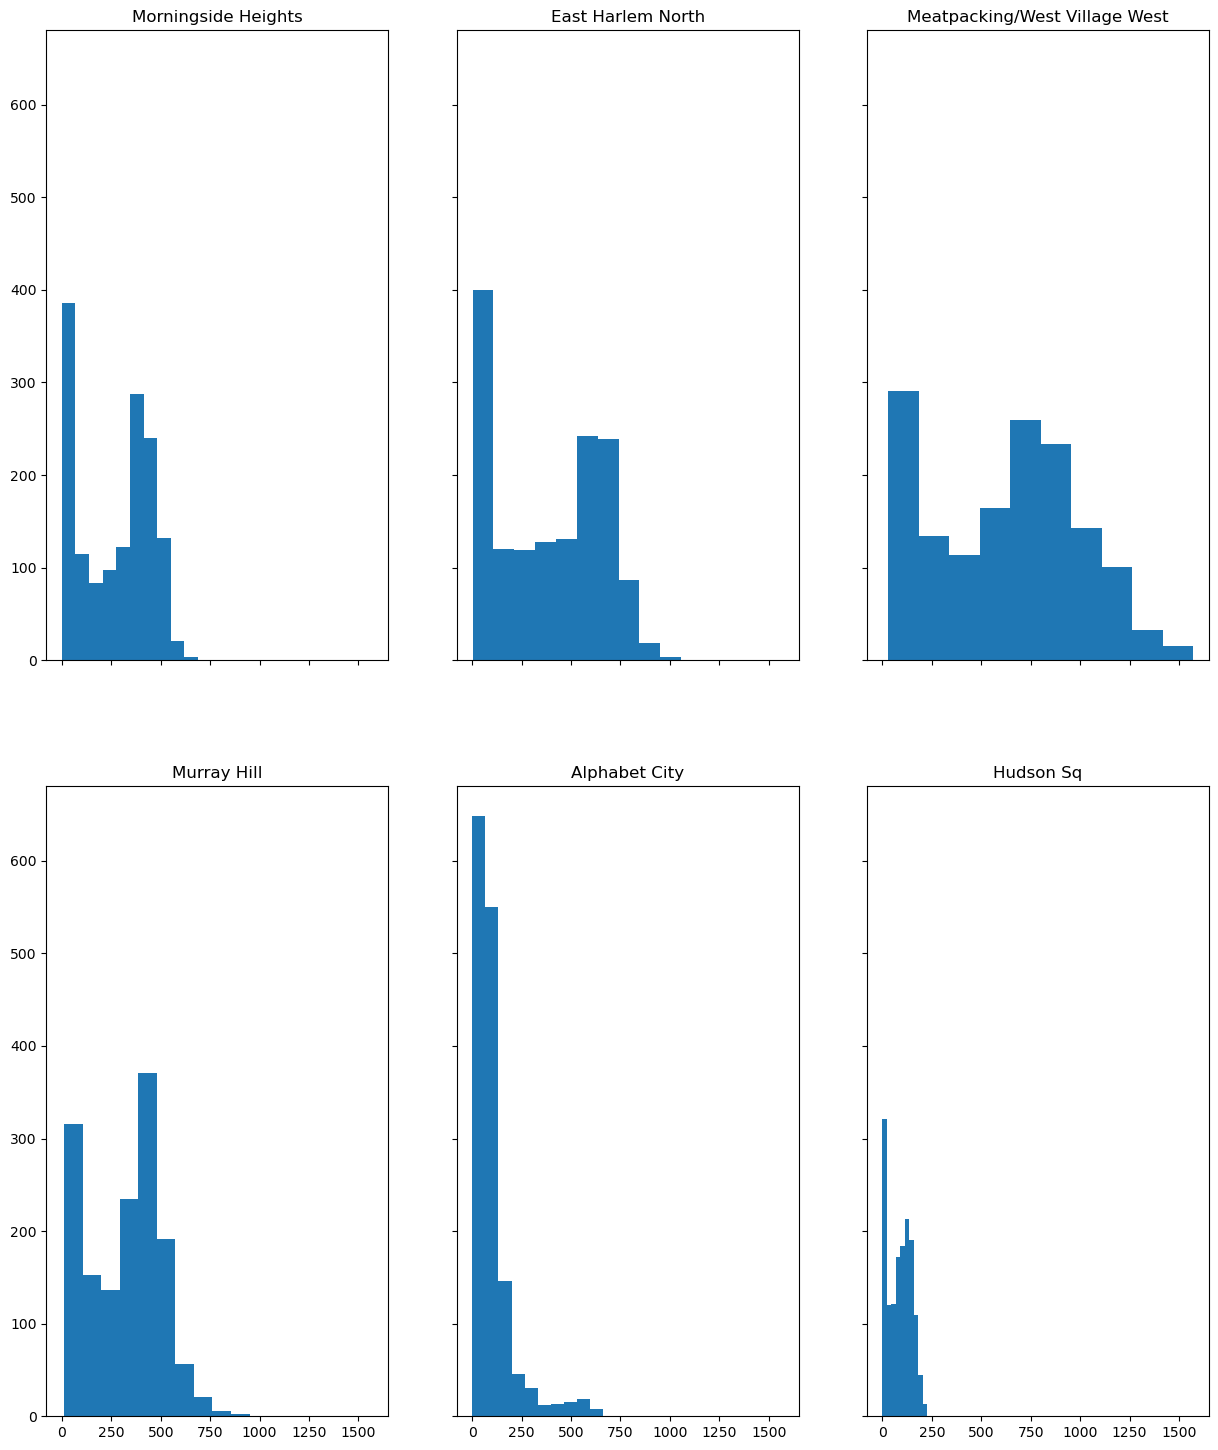

In [39]:
fig, axs = plt.subplots(2,3, sharex=True, sharey = True, figsize = (15,18))
index = 0 
total_demand_per_zone = np.sum(master_pt_small[:,:,:],axis = 1)
for i in range(2):
    for j in range(3):
        axs[i][j].hist(total_demand_per_zone[index])
        axs[i][j].title.set_text(mapping[index+1][0])
        index+=1